In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB

Q1_
1.  (Titanic Dataset)
1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class. 
a. Do you think we should keep this feature? 
2. Do at least two visualizations to describe or show correlations. 
3. Implement Naïve Bayes method using scikit-learn library and report the accuracy

In [5]:
train_df = pd.read_csv('C:/Users/deepp/OneDrive/Desktop/ML/Assignment_3/Dataset/Dataset/train.csv')
test_df = pd.read_csv('C:/Users/deepp/OneDrive/Desktop/ML/Assignment_3/Dataset/Dataset/test.csv')
combine = [train_df, test_df] #add data

In [6]:
print(train_df.columns.values) #features of our database

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train_df.head() #check dataset 
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.tail() #check ending of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train_df.info()
print('_'*60)
test_df.info() # how to check two table info in one , only make one line between two table and run.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  --

In [10]:
train_df.describe()  # describe data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
##Analyze by pivoting features ---> the higher the number means more correlation with the target

In [15]:
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)

      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________


In [ ]:
#Analyze by visualizing data
#Correlating numerical features

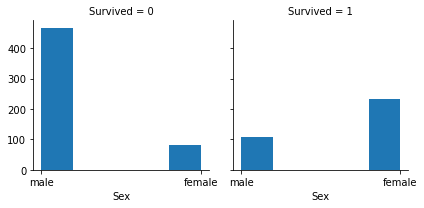

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=5)
#calssification histogram

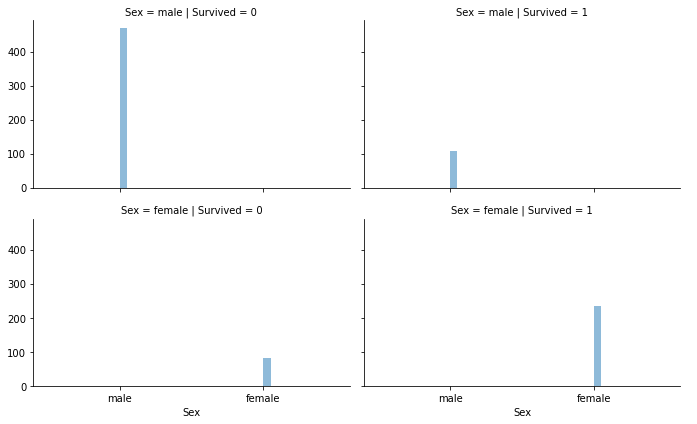

In [17]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex',  aspect=1.6)
grid.map(plt.hist, 'Sex', alpha=.5, bins=20)
grid.add_legend();

In [18]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S


In [21]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)

In [22]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
print(dataset['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [24]:
for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
###Creating new feature extracting from existing

In [25]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
###We can convert the categorical titles to ordinal

In [26]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
##Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId

In [27]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
##Converting a categorical feature

In [28]:
print(train_df.isnull().sum()) #check any null value or not 

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


In [29]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [30]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [31]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [32]:
meanAge = int(train_df.Age.dropna().mean())
print('Mean Age = ', meanAge)

Mean Age =  29


In [33]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

In [34]:
combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)

In [19]:
trainnew =pd.read_csv('train_preprocessed.csv')
testnew =pd.read_csv('test_preprocessed.csv')
testnew

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,0,34.5,7.8292,2
1,893,3,1,47.0,7.0000,0
2,894,2,0,62.0,9.6875,2
3,895,3,0,27.0,8.6625,0
4,896,3,1,22.0,12.2875,0
...,...,...,...,...,...,...
413,1305,3,0,29.0,8.0500,0
414,1306,1,1,39.0,108.9000,1
415,1307,3,0,38.5,7.2500,0
416,1308,3,0,29.0,8.0500,0


In [20]:
X_train = trainnew.drop("Survived", axis=1)
Y_train = trainnew["Survived"]
X_test  = testnew.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [21]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.67

QUESTION 2:
(Glass Dataset) 
1. Implement Naïve Bayes method using scikit-learn library.
a. Use the glass dataset available in Link also provided in your assignment.
b. Use train_test_split to create training and testing part. 
2. Evaluate the model on testing part using score and  classification_report(y_true, y_pred) 

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [25]:
glass = pd.read_csv("C:/Users/deepp/OneDrive/Desktop/ML/Assignment_3/Dataset/Dataset/glass.csv")

In [26]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [29]:
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [57]:
# predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score check here
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


question:3 
1. Implement linear SVM method using scikit library 
a. Use the glass dataset available in Link also provided in your assignment.
b. Use train_test_split to create training and testing part. 
2. Evaluate the model on testing part using score and  classification_report(y_true, y_pred) 

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [33]:
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)

In [66]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.36      1.00      0.53        47
           3       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        17

    accuracy                           0.36       129
   macro avg       0.06      0.17      0.09       129
weighted avg       0.13      0.36      0.19       129

[[ 0 45  0  0  0  0]
 [ 0 47  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0 17  0  0  0  0]]
accuracy is 0.3643410852713178


In [35]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.52      0.28      0.36        47
           3       0.16      0.86      0.27        14
           5       0.00      0.00      0.00         3
           6       0.43      1.00      0.60         3
           7       0.89      0.94      0.91        17

    accuracy                           0.34       129
   macro avg       0.33      0.51      0.36       129
weighted avg       0.33      0.34      0.29       129

[[ 0  8 35  0  1  1]
 [ 0 13 28  3  3  0]
 [ 0  2 12  0  0  0]
 [ 0  2  0  0  0  1]
 [ 0  0  0  0  3  0]
 [ 0  0  1  0  0 16]]
accuracy is 0.34108527131782945


In [36]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.40      0.51      0.45        45
           2       0.41      0.40      0.41        47
           3       0.00      0.00      0.00        14
           5       0.67      0.67      0.67         3
           6       0.43      1.00      0.60         3
           7       0.93      0.82      0.87        17

    accuracy                           0.47       129
   macro avg       0.47      0.57      0.50       129
weighted avg       0.44      0.47      0.45       129

[[23 21  0  0  1  0]
 [23 19  0  1  3  1]
 [10  4  0  0  0  0]
 [ 1  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 1  2  0  0  0 14]]
accuracy is 0.4728682170542636


In [37]:
# Complement Naive Bayes

from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
#print(round(accuracy_score(y_pred,y_test)*100))

              precision    recall  f1-score   support

           1       0.43      0.89      0.58        45
           2       0.29      0.04      0.07        47
           3       0.00      0.00      0.00        14
           5       0.75      1.00      0.86         3
           6       0.12      0.33      0.18         3
           7       0.89      0.94      0.91        17

    accuracy                           0.48       129
   macro avg       0.41      0.53      0.44       129
weighted avg       0.39      0.48      0.38       129

[[40  4  0  0  0  1]
 [36  2  0  1  7  1]
 [13  1  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 2  0  0  0  1  0]
 [ 1  0  0  0  0 16]]
accuracy is 0.4806201550387597
